In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score
     

In [2]:
df=pd.read_csv('loan_prediction.csv sep 2024')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis

In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID 0 Gender 13 Married 3 Dependents 15 Education 0 Self_Employed 32 ApplicantIncome 0 CoapplicantIncome 0 LoanAmount 22 Loan_Amount_Term 14 Credit_History 50 Property_Area 0 Loan_Status 0 dtype: int64

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.Gender.fillna(value=df.Gender.mode()[0], axis=0, inplace =True )
df.Married.fillna(value=df.Married.mode()[0], axis=0, inplace =True )
df.Dependents.fillna(value=df.Dependents.mode()[0], axis = 0 , inplace = True)
df.Self_Employed.fillna(value=df.Self_Employed.mode()[0], axis = 0 ,inplace =True)
df.LoanAmount.fillna(value=df.LoanAmount.mean(), axis =0 , inplace = True)
df.Loan_Amount_Term.fillna(value =df.Loan_Amount_Term.median(), axis =0 , inplace = True)
df.Credit_History.fillna(value =df.Credit_History.mode()[0], axis =0, inplace=True)
     

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [15]:
# Dependents columns replaceing value 3+ to 4
df.replace(to_replace="3+" , value="4", inplace = True)
     


In [16]:
# Dependent column values
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [17]:
# drop the loan_id columns
df.drop(columns = "Loan_ID", axis = 1, inplace = True)
     

# Data Visualisation

<Axes: xlabel='Credit_History', ylabel='count'>

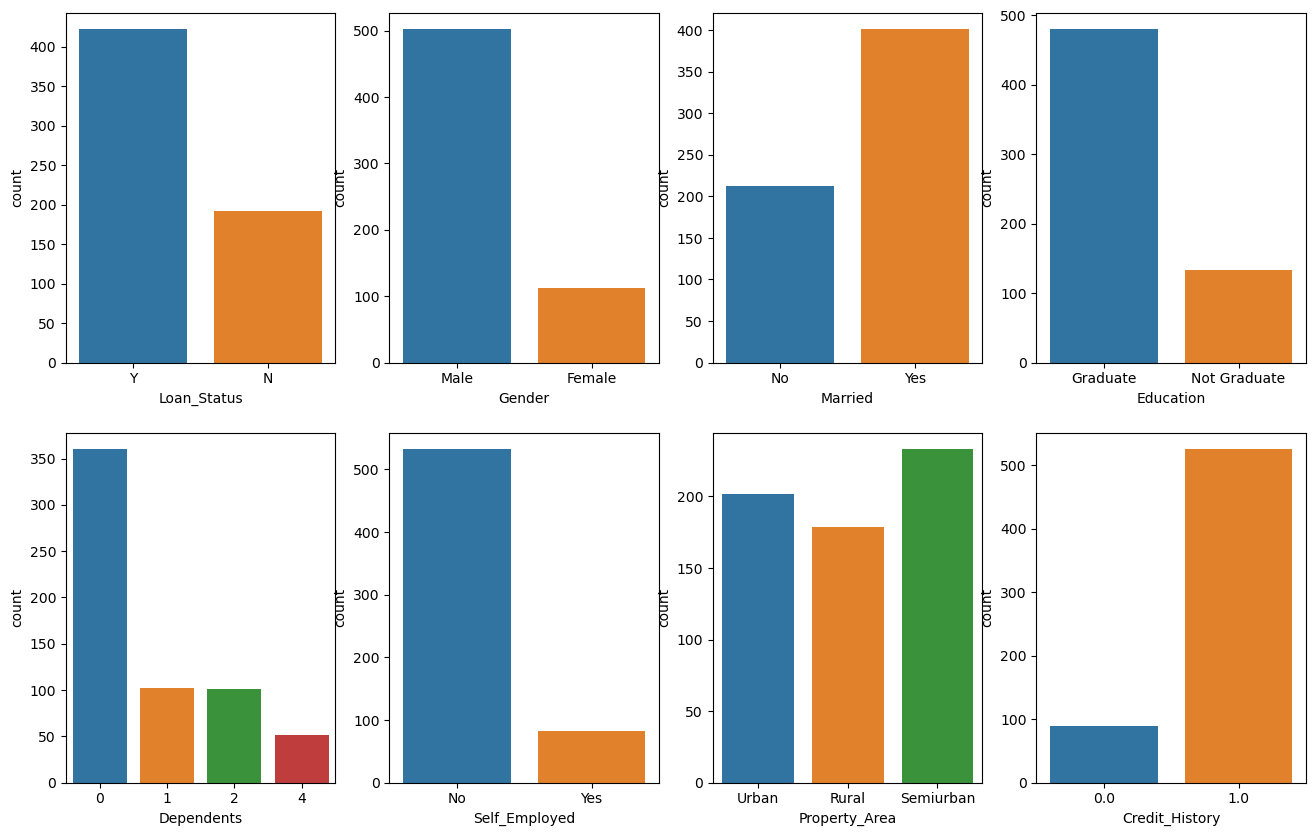

In [18]:

#visualisation the data

fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Loan_Status', data = df, ax=ax[0][0])
sns.countplot(x='Gender', data=df, ax=ax[0][1])
sns.countplot(x='Married', data=df, ax=ax[0][2])
sns.countplot(x='Education', data=df, ax=ax[0][3])
sns.countplot(x='Dependents', data=df, ax=ax[1][0])
sns.countplot(x='Self_Employed', data=df, ax=ax[1][1])
sns.countplot(x='Property_Area', data=df, ax=ax[1][2])
sns.countplot(x='Credit_History', data=df, ax=ax[1][3])


<Axes: xlabel='Education', ylabel='count'>

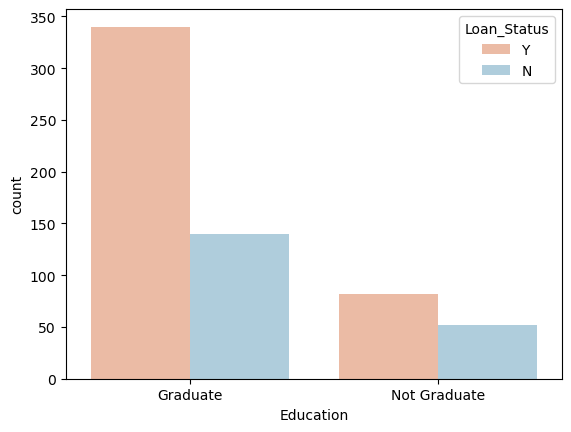

In [19]:

# Education and Loan Status
sns.countplot(x="Education", hue = "Loan_Status", data = df, palette="RdBu")
     

<Axes: xlabel='Gender', ylabel='count'>

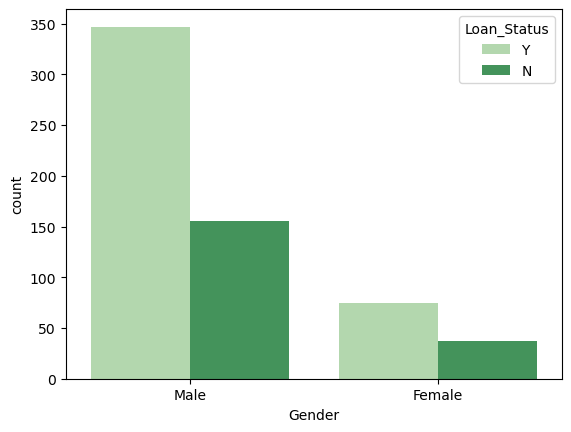

In [20]:
# Gender and Loan status
sns.countplot(x = "Gender" , hue = "Loan_Status", data= df, palette="Greens")
     

<Axes: xlabel='Married', ylabel='count'>

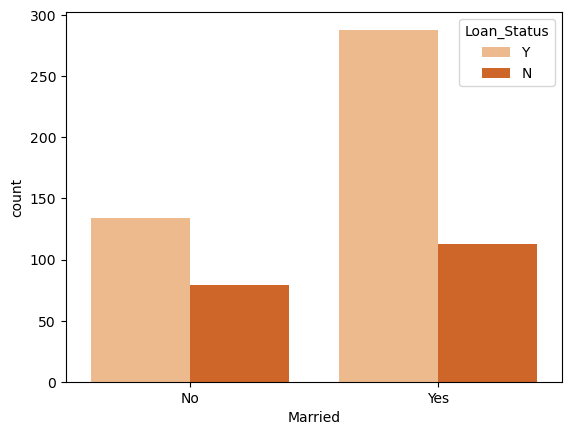

In [21]:
# Marital status and Loan Status
sns.countplot(x = "Married" , hue = "Loan_Status", data= df, palette= "Oranges")
     

# Histogram Distribution

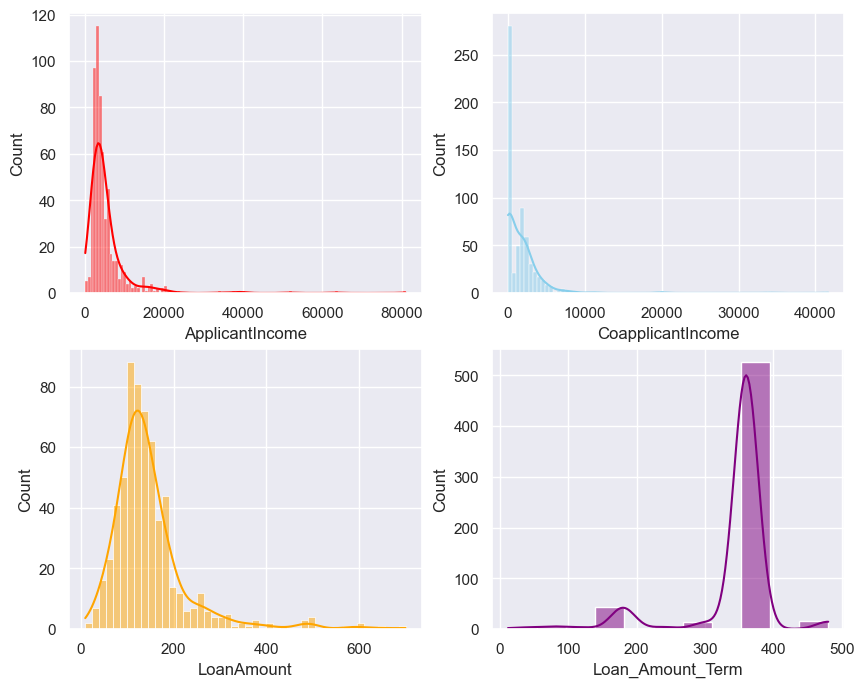

In [22]:
# Distribution numerical variable using the Histogram

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');


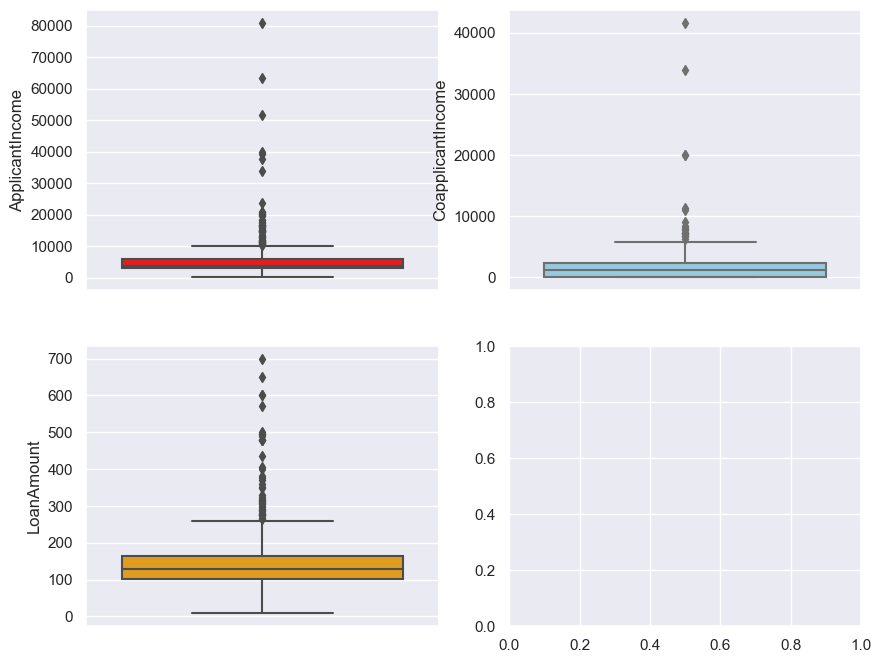

In [23]:
#Box plot using to show outliers

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, y="ApplicantIncome", ax=axs[0, 0], color='red')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs[1, 0], color='orange');

# Skewed Distribution Treatment

In [24]:

# Squre root transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
df.Loan_Amount_Term = np .sqrt(df.Loan_Amount_Term)

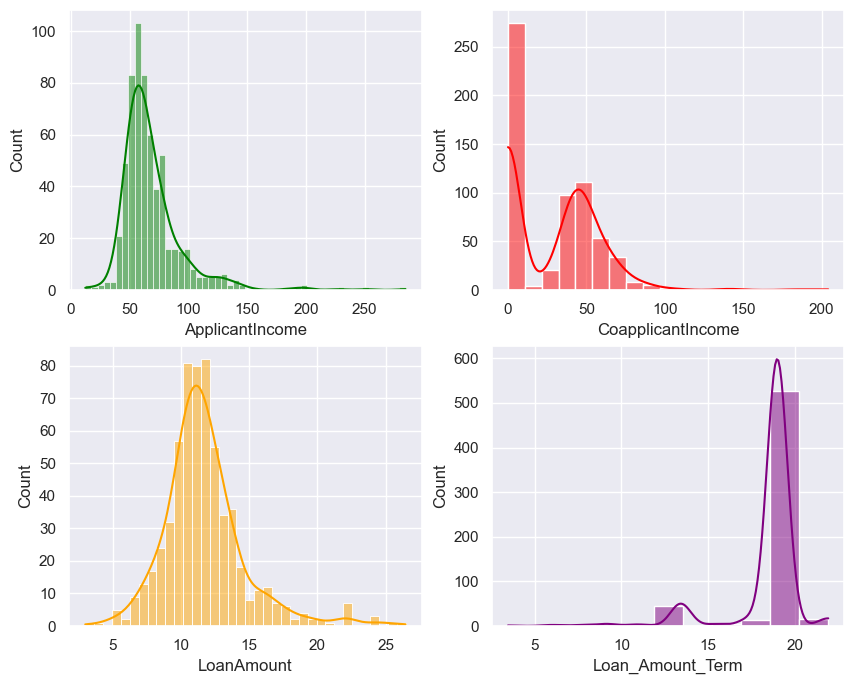

In [25]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='red')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');
     

# Label Encoding

In [26]:
lab_end = LabelEncoder()

In [27]:
columns =["Gender","Married","Education","Self_Employed", "Property_Area","Loan_Status"]

df[columns] = df[columns].apply(lab_end.fit_transform)

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.100089,18.973666,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,18.973666,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,18.973666,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,18.973666,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,18.973666,1.0,2,1


In [29]:

# seprating the data in x and y
x = df.drop(columns = "Loan_Status", axis = 1)
y = df["Loan_Status"]

# Train and Test Split

In [30]:
#Train the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2 , stratify=y)
     

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(614, 11) (552, 11) (62, 11)


# Build Machine Learing Model

Logistic Regression

In [32]:
log_model = LogisticRegression(max_iter=150, solver="liblinear") #'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
log_model.fit(x_train,y_train)

log_prediction = log_model.predict(x_test)

print(classification_report(log_prediction, y_test))
print( confusion_matrix(log_prediction,y_test))

log_acc = accuracy_score(log_prediction,y_test)
print("Logistic Regression accuracy_score: {:.2f}% ". format(log_acc*100))
     

              precision    recall  f1-score   support

           0       0.47      0.82      0.60        11
           1       0.95      0.80      0.87        51

    accuracy                           0.81        62
   macro avg       0.71      0.81      0.74        62
weighted avg       0.87      0.81      0.82        62

[[ 9  2]
 [10 41]]
Logistic Regression accuracy_score: 80.65% 


Support Vector Machine

In [33]:
svm_model = SVC(kernel="rbf",gamma ='auto', C = 6) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' # auto,scale
svm_model.fit(x_train, y_train)

svm_prediction = svm_model.predict(x_test)

print(classification_report(svm_prediction,y_test))
print(confusion_matrix(svm_prediction,y_test))

svm_acc = accuracy_score(svm_prediction,y_test)
print("SVM accuracy_score : {:.2f}%".format(svm_acc*100))
     

              precision    recall  f1-score   support

           0       0.47      0.69      0.56        13
           1       0.91      0.80      0.85        49

    accuracy                           0.77        62
   macro avg       0.69      0.74      0.71        62
weighted avg       0.82      0.77      0.79        62

[[ 9  4]
 [10 39]]
SVM accuracy_score : 77.42%


Decision Tree

In [34]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=120)
rf_model.fit(x_train,y_train)

rf_prediction = rf_model.predict(x_test)

print(classification_report(rf_prediction, y_test))
print( confusion_matrix(rf_prediction,y_test))

rf_acc = accuracy_score(rf_prediction,y_test)
print("Random_forest accuracy_score: {:.2f}% ". format(rf_acc*100))

              precision    recall  f1-score   support

           0       0.53      0.71      0.61        14
           1       0.91      0.81      0.86        48

    accuracy                           0.79        62
   macro avg       0.72      0.76      0.73        62
weighted avg       0.82      0.79      0.80        62

[[10  4]
 [ 9 39]]
Random_forest accuracy_score: 79.03% 


# K-Nearest Neighbour (KNN)

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train,y_train)

knn_prediction = knn_model.predict(x_test)

print(classification_report(knn_prediction, y_test))
print( confusion_matrix(knn_prediction,y_test))

knn_acc = accuracy_score(knn_prediction,y_test)
print("KNN accuracy_score: {:.2f}% ". format(knn_acc*100))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10         1
           1       1.00      0.70      0.83        61

    accuracy                           0.71        62
   macro avg       0.53      0.85      0.46        62
weighted avg       0.98      0.71      0.82        62

[[ 1  0]
 [18 43]]
KNN accuracy_score: 70.97% 


Naïve Bayes

In [36]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(x_train, y_train)

NBclassifier1_prediction = NBclassifier1.predict(x_test)

print(classification_report(NBclassifier1_prediction, y_test))
print( confusion_matrix(NBclassifier1_prediction,y_test))

NBclassifier1_acc = accuracy_score(NBclassifier1_prediction,y_test)
print("Categorical NB accuracy_score: {:.2f}% ". format(NBclassifier1_acc*100))
     

              precision    recall  f1-score   support

           0       0.47      0.75      0.58        12
           1       0.93      0.80      0.86        50

    accuracy                           0.79        62
   macro avg       0.70      0.78      0.72        62
weighted avg       0.84      0.79      0.81        62

[[ 9  3]
 [10 40]]
Categorical NB accuracy_score: 79.03% 


In [59]:
compare_model = pd.DataFrame({'Model': ['Logistic Regression',"Support Vector Machine", "Decision Tree",
                             "Random Forest", "K-Nearest Neighbour", " Categorical NB"],
                  'Accuracy_Score': [logit_as*100,svm_as*100,dt_as*100,rf_as*100,knn_as*100,
                                     NBclassifier1_as*100]})


compare_model.sort_values(by='Accuracy_Score', ascending=False)

NameError: name 'logit_as' is not defined